# Student Grades Homework

#### Boilerplate python modules:

In [1]:
# This line configures matplotlib to show figures embedded in the notebook.
%matplotlib inline
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load student grades homework, and take a look at it.

In [2]:
grades = pd.read_csv("studentgrades.csv")
grades.head()

,Hours,Pass Fail,Grades
0,0.50,FAIL,72.50
1,0.75,FAIL,73.75
2,1.00,FAIL,75.00
3,1.25,FAIL,76.25
4,1.50,FAIL,77.50


## Question 1) _What is the association between the number of hours spent studying and the probability that the student will pass the exam?_

To answer this, lets look at boxplots of Hours spent studying grouped by whether the student passed or failed.

Grades                                                          \
           count    mean       std   min      25%     50%      75%   max   
Pass Fail                                                                  
FAIL        10.0  76.950  2.443245  72.5  75.3125  78.125  78.9375  79.0   
PASS        10.0  89.125  6.010696  80.0  84.3750  90.625  93.4375  97.5   

          Hours                                                     
          count   mean       std   min     25%    50%     75%  max  
Pass Fail                                                           
FAIL       10.0  1.775  0.982132  0.50  1.0625  1.625  2.3750  3.5  
PASS       10.0  3.800  1.246105  1.75  2.8750  4.125  4.6875  5.5

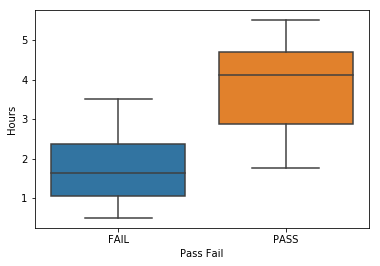

In [3]:
bx=sns.boxplot(x='Pass Fail', y='Hours', data=grades)
grades.groupby('Pass Fail').describe()

Looking at the data, it looks look students that only studied a couple of hours or less failed the exam.  Students that studied around 4 or more hours had the highest probability of passing.

## Question 2) _What are your predictions of a student passing if they spend 3.1 hours studying and if they spend 7 hours studying?_

Lets create a [Logistic Regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model to help us answer this question.

In [4]:
lr = LogisticRegression()
# Required input variables to LinearRegression
# X : {array-like, sparse matrix}, shape (n_samples, n_features)
# y : array-like, shape (n_samples,)
X = np.column_stack((np.ones(len(grades)), grades['Hours']))
y = grades['Pass Fail']
lr.fit(X, y)
print("Coefficients are ", lr.coef_)
# Note intercept is beta0 given above
print("Checking the y-intercept ", lr.intercept_)
# Note the score is not retunred by the LinearRegression object. It has to be computed from the input.
print("Score is ", lr.score(X, y))

Coefficients are  [[-0.92419996  0.75602391]]
Checking the y-intercept  [-0.92419996]
Score is  0.75


Our model's mean accuracy is `0.75`.  Lets use it to answer to predict if a student will pass the exam for the given data points.

In [5]:
for hours in [3.1, 7.0]:
    [prob_fail, prob_pass] = lr.predict_proba([[1, hours]])[0]
    print("Probability of student passing if they spend %0.1f hours studying: %0.02f%%" % (hours, prob_pass*100))


Probability of student passing if they spend 3.1 hours studying: 62.13%
Probability of student passing if they spend 7.0 hours studying: 96.90%


## Question 3) _How is the number of hours spent studying related to the grade the student earned?_

Lets use `seaborn`'s [lmplot() function](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to look at the relationship between hours spent studying, and the grade the student earned.

Correlation between hours spent studying and grade the student earned: 0.95


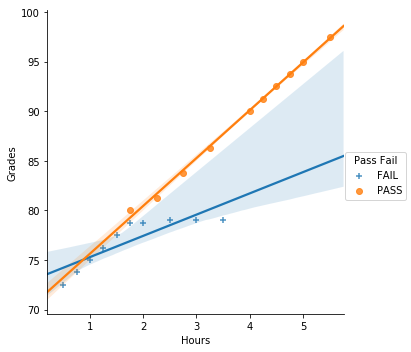

In [6]:
lmp = sns.lmplot('Hours', 'Grades', hue='Pass Fail', markers = ['+', 'o'], data=grades)
corr = grades['Hours'].corr(grades['Grades'])
print("Correlation between hours spent studying and grade the student earned: %0.02f" % corr)

There is an almost direct correlation between number of hours spent studying, and the grade the student earned (0.95 correlation).  However, there is a set of students that did study 2-3.5 hours and still earned just below a passing score.